In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import io
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [2]:
excel="bodyfat.csv"
dataframe=pd.read_csv(excel)

In [3]:
dataframe.head()

,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Density
0,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,1.0708
1,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,1.0853
2,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,1.0414
3,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,1.0751
4,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,1.0340


In [4]:
dataframe.shape

(252, 15)

In [5]:
#Age has nothing todo with bodyfat
dataframe=dataframe.drop(["Age"],axis=1)

In [6]:
dataframe.head()

,BodyFat,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Density
0,12.3,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,1.0708
1,6.1,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,1.0853
2,25.3,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,1.0414
3,10.4,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,1.0751
4,28.7,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,1.0340


In [7]:
dataframe.shape

(252, 14)

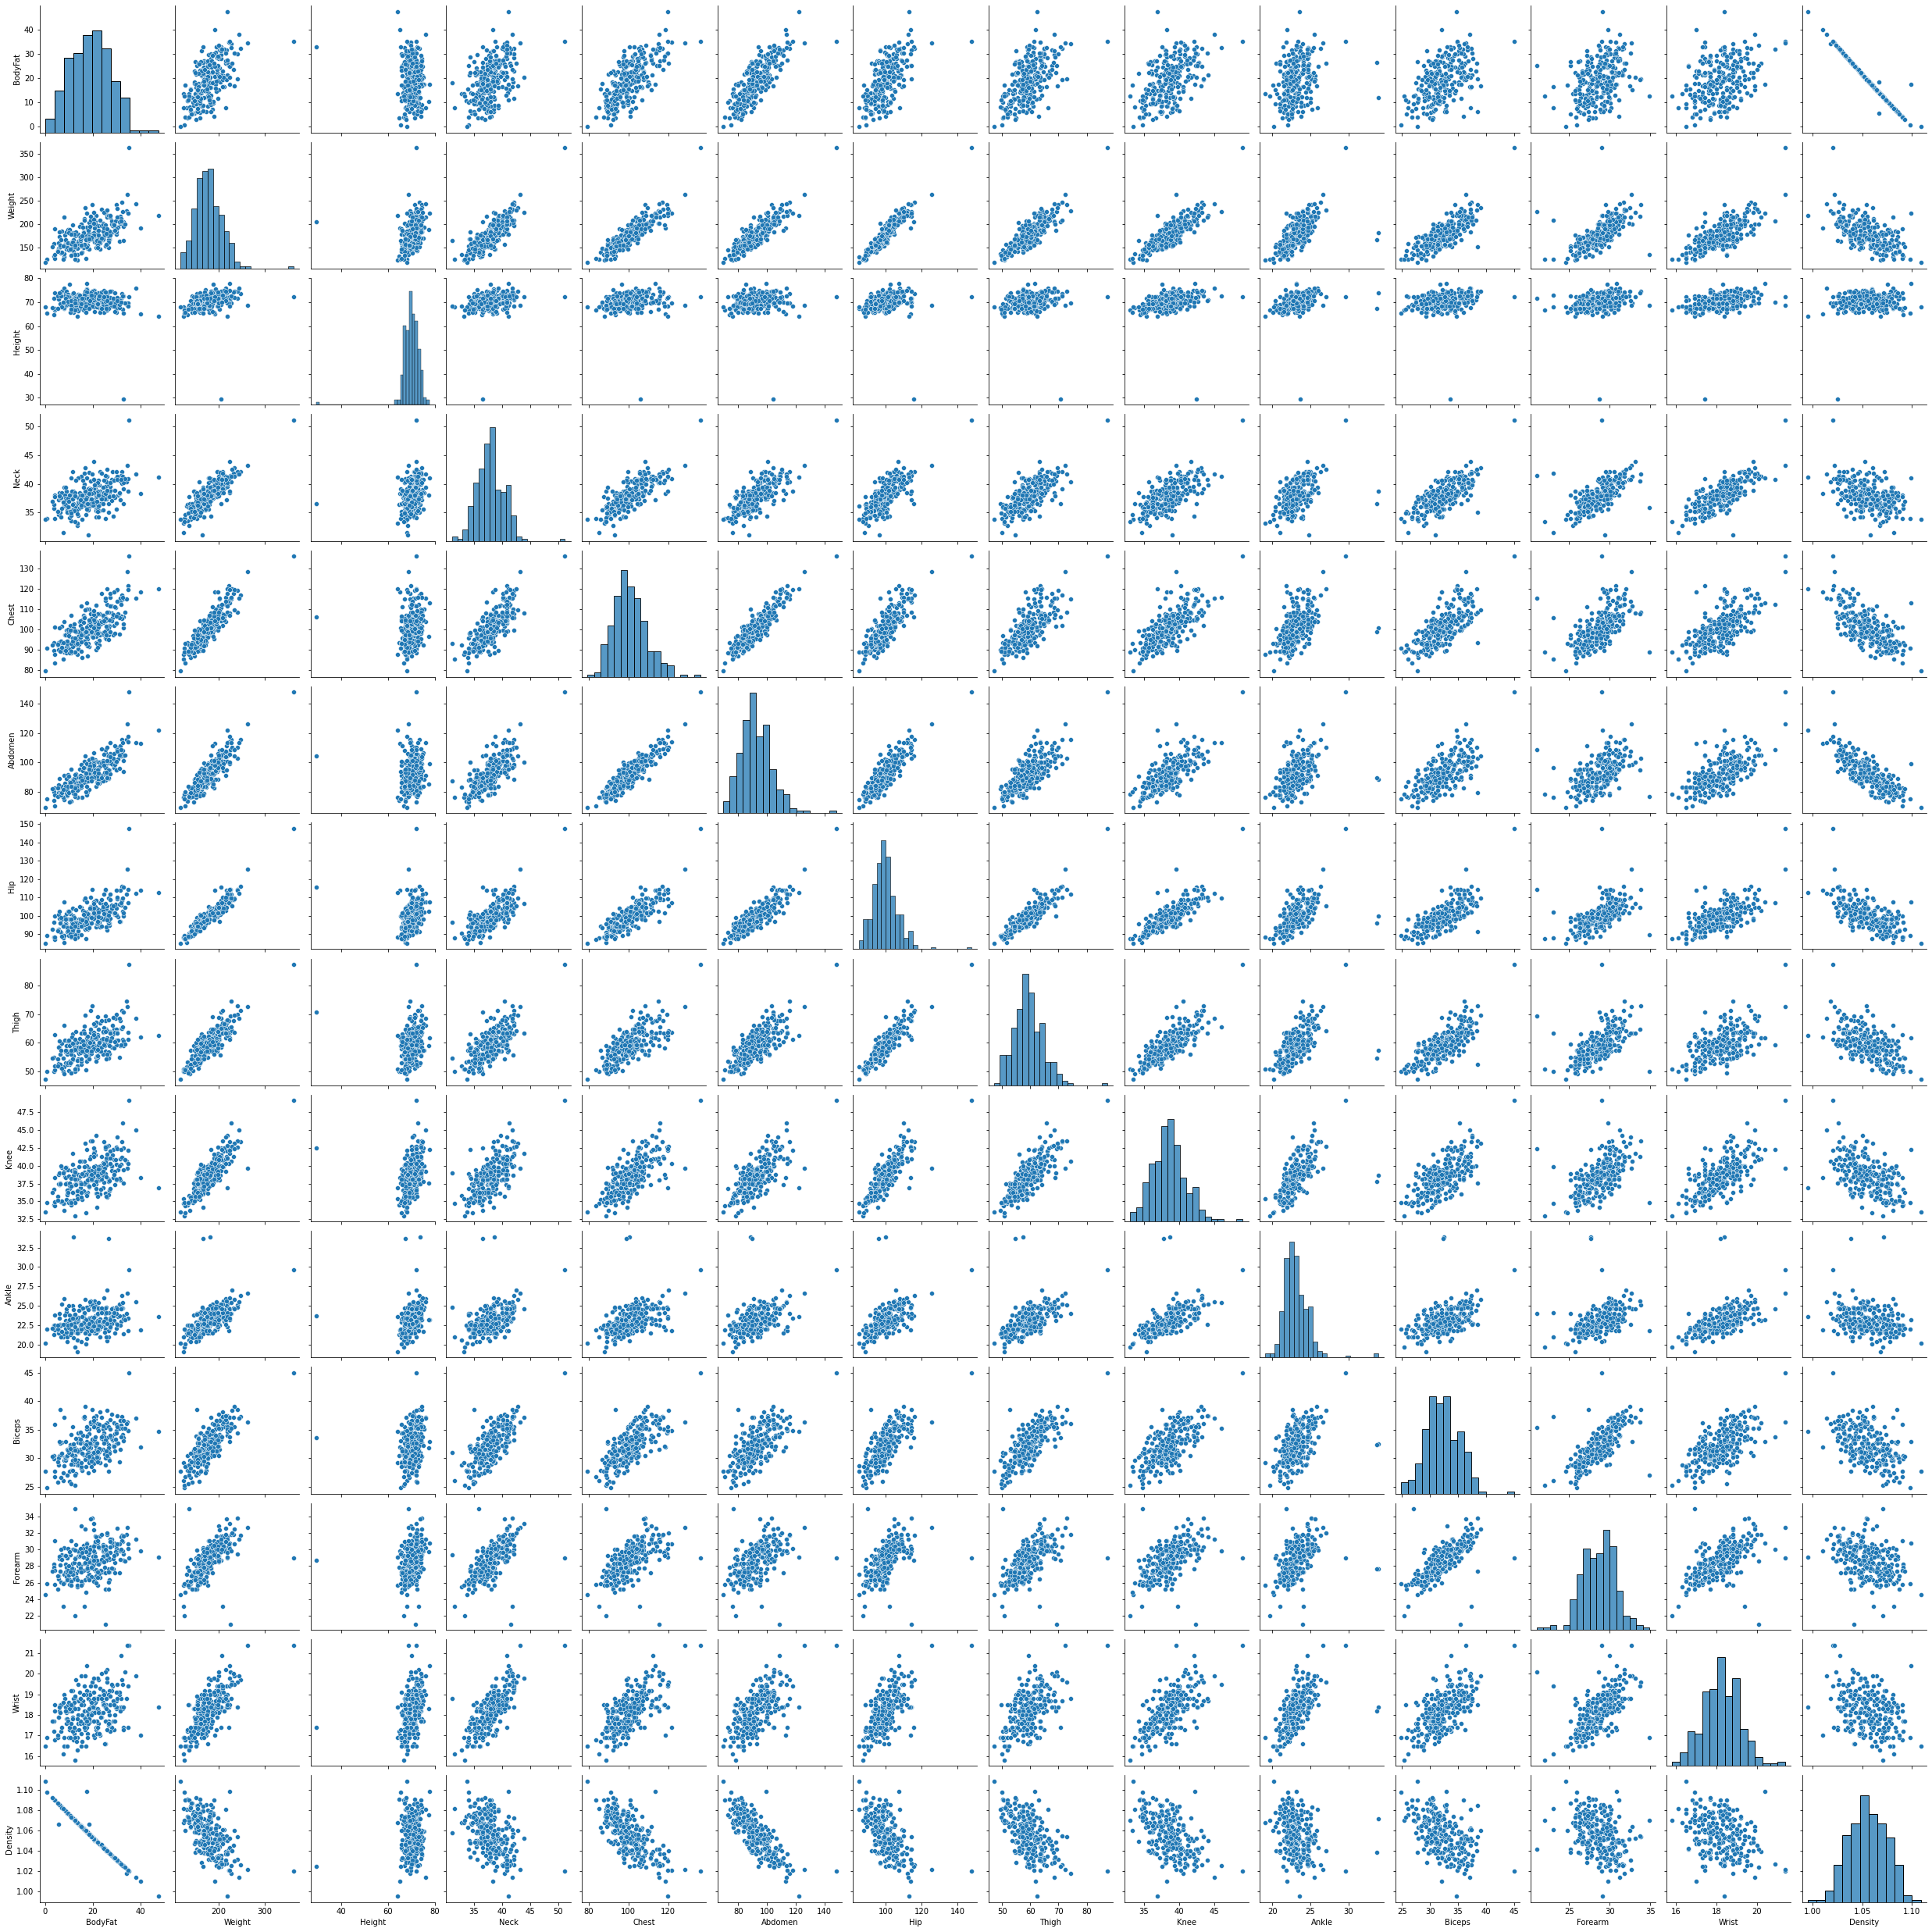

In [8]:
sns.pairplot(dataframe)

In [9]:
dataframe.describe()

,BodyFat,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Density
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,19.150794,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762,1.055574
std,8.368740,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585,0.019031
min,0.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000,0.995000
25%,12.475000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000,1.041400
50%,19.200000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000,1.054900
75%,25.300000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000,1.070400
max,47.500000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000,1.108900


In [10]:
dataframe.isnull().sum()
#No null values, no categorical values

BodyFat    0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
Density    0
dtype: int64

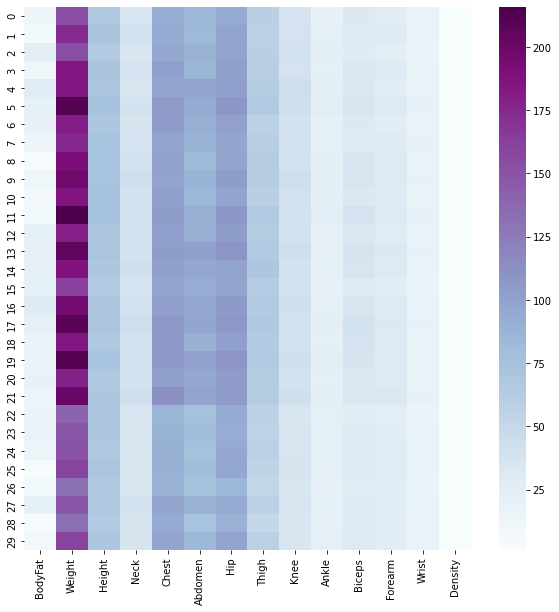

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(dataframe.head(30),cmap="BuPu")
plt.show()



In [12]:

#splitting into dependent and independent variables

from sklearn.model_selection import train_test_split
#independent variables
x=dataframe.iloc[:,1:14].values
#dependent variable
y=dataframe.iloc[:,0].values


In [13]:
#multivariant linear regression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)
y_pred=lm.predict(x_test)
y_pred

array([12.5311864 , 26.54616643,  3.22353282, 20.4999141 ,  9.47373454,
       22.85623682, 24.92245431, 25.21878069, 25.89442232, 27.18146139,
       25.74819258, 15.73825213, 21.22176379, 20.8625642 , 16.47349   ,
       13.25181459, 16.59783796,  0.93533565, 10.43548916, 11.66858724,
       20.82147204, 14.01972351, 29.27138685, 22.03773548, 19.51682908,
       32.10049879,  4.37890453, 23.06119134, 21.43969824, 28.0819089 ,
       30.44130171, 26.37995065, 27.88114012, 11.67025354, 35.77122754,
       13.84866341, 24.46578557, 21.28923209, 14.94189545, 11.41594433,
       17.61618758, 20.99301208, 35.05503076, 22.15358893, 20.90850525,
       14.9415015 , 12.60483688,  7.49970757, 31.5312481 , -4.33221805,
        8.78947928])

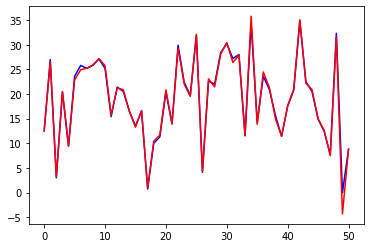

In [14]:
plt.plot(y_test,color="blue")
plt.plot(y_pred,color="red")

In [15]:

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


In [16]:
#Performance metrics 
mean_squared_error(y_test,y_pred)

0.5563224522858568

In [17]:
mean_absolute_error(y_test,y_pred)

0.4108879284909716

In [18]:
r2_score(y_test,y_pred)

0.9923078047287585

In [19]:
lm.score(x,y)

0.9777988539417541

In [30]:
import tkinter
from tkinter import ttk
from tkinter import *
from PIL import ImageTk, Image
import pandas as pd
import tkinter  as tk
from tkinter import filedialog
from tkinter.filedialog import askopenfile







from tkinter import *
from tkinter import messagebox
bodyFat=0
import tkinter as tk
def Prediction():
    top = tkinter.Tk()
    top.title("Prediction")
    top.geometry('1000x1000')
    top['background']='gray'
    head = tkinter.Label(top, text = "   \t  BODY FAT PRED \t    ",
                 bg='black', fg='White',font=("Serif", 32, 'bold')).place(x =100,y =2 )
    tkinter.Label(top,text="WEIGHT",bg='gray',font=("Serif", 14, 'bold')).place(x=30,y=150)
    k1=tk.StringVar()
    k1_entrybox=ttk.Entry(top,width=16,textvariable=k1)
    k1_entrybox.place(x=300,y=150)

    tkinter.Label(top,text="HEIGHT",bg='gray',font=("Serif", 14, 'bold')).place(x=30,y=200)
    k2=tk.StringVar()
    k2_entrybox=ttk.Entry(top,width=16,textvariable=k2)
    k2_entrybox.place(x=300,y=200)

    tkinter.Label(top,text="NECK",bg='gray',font=("Serif", 14, 'bold')).place(x=30,y=250)
    k3=tk.StringVar()
    k3_entrybox=ttk.Entry(top,width=16,textvariable=k3)
    k3_entrybox.place(x=300,y=250)

    tkinter.Label(top,text="CHEST",bg='gray',font=("Serif", 14, 'bold')).place(x=30,y=300)
    k4=tk.StringVar()
    k4_entrybox=ttk.Entry(top,width=16,textvariable=k4)
    k4_entrybox.place(x=300,y=300)

    tkinter.Label(top,text="ABDOMEN",bg='gray',font=("Serif", 14, 'bold')).place(x=30,y=350)
    k5=tk.StringVar()
    k5_entrybox=ttk.Entry(top,width=16,textvariable=k5)
    k5_entrybox.place(x=300,y=350)

    tkinter.Label(top,text="HIP",bg='gray',font=("Serif", 14, 'bold')).place(x=30,y=400)
    k6=tk.StringVar()
    k6_entrybox=ttk.Entry(top,width=16,textvariable=k6)
    k6_entrybox.place(x=300,y=400)

    tkinter.Label(top,text="THIGH",bg='gray',font=("Serif", 14, 'bold')).place(x=30,y=450)
    k7=tk.StringVar()
    k7_entrybox=ttk.Entry(top,width=16,textvariable=k7)
    k7_entrybox.place(x=300,y=450)

    tkinter.Label(top,text="KNEE",bg='gray',font=("Serif", 14, 'bold')).place(x=30,y=500)
    k8=tk.StringVar()
    k8_entrybox=ttk.Entry(top,width=16,textvariable=k8)
    k8_entrybox.place(x=300,y=500)

    tkinter.Label(top,text="ANKLE",bg='gray',font=("Serif", 14, 'bold')).place(x=30,y=550)
    k9=tk.StringVar()
    k9_entrybox=ttk.Entry(top,width=16,textvariable=k9)
    k9_entrybox.place(x=300,y=550)

    tkinter.Label(top,text="BICEPS",bg='gray',font=("Serif", 14, 'bold')).place(x=30,y=600)
    k10=tk.StringVar()
    k10_entrybox=ttk.Entry(top,width=16,textvariable=k10)
    k10_entrybox.place(x=300,y=600)

    tkinter.Label(top,text="FOREARM",bg='gray',font=("Serif", 14, 'bold')).place(x=590,y=150)
    k11=tk.DoubleVar()
    k11_entrybox=ttk.Entry(top,width=16,textvariable=k11)
    k11_entrybox.place(x=860,y=150)

    tkinter.Label(top,text="WRIST",bg='gray',font=("Serif", 14, 'bold')).place(x=590,y=200)
    k12=tk.StringVar()
    k12_entrybox=ttk.Entry(top,width=16,textvariable=k12)
    k12_entrybox.place(x=860,y=200)

    tkinter.Label(top,text="DENSITY",bg='gray',font=("Serif", 14, 'bold')).place(x=590,y=250)
    k13=tk.StringVar()
    k13_entrybox=ttk.Entry(top,width=16,textvariable=k13)
    k13_entrybox.place(x=860,y=250)

    
    def Submit():
        v=[]
        d1=float(k1_entrybox.get())
        
        d2=float(k2_entrybox.get())
        
        d3=float(k3_entrybox.get())
        
        d4=float(k4_entrybox.get())
        
        d5=float(k5_entrybox.get())
        
        d6=float(k6_entrybox.get())
        
        d7=float(k7_entrybox.get())
        
        d8=float(k8_entrybox.get())
        
        d9=float(k9_entrybox.get())
        
        d10=float(k10_entrybox.get())
        
        d11=float(k11_entrybox.get())
        
        d12=float(k12_entrybox.get())
        
        d13=float(k13_entrybox.get())
        
        

        newWindow3 = tkinter.Toplevel(top)
        newWindow3.title("Patient Result")
        newWindow3['background']='white'
        newWindow3.geometry("800x450")
        label=tkinter.Label(newWindow3,
              text ='             Patient Result  \t  \t', bg='black', fg="white", font=("Serif", 32, 'bold')).place(x = 0,y = 10)

        d={'Weight' :[d1] ,'Height' :[d2],' Neck':[d3],'Chest':[d4],'Abdomen':[d5],'Hip':[d6],'Thigh':[d7],'Knee':[d8],
                'Ankle':[d9],'Biceps':[d10],'ForeArm':[d11],'Wrist':[d12],'Density':[d13]}
        #print(type(d1))
        #print(type(d3))
        df3=pd.DataFrame(d)
        #print(df3)
        bodyFat = lm.predict(df3)
        abel=tkinter.Label(newWindow3,
              text =bodyFat, bg='white', fg="black", font=("Serif", 32, 'bold')).place(x = 80,y = 150)


       


        tkinter.Label(newWindow3,text =result,bg='white',font=("Serif", 26,'bold')).place(x = 2,y = 100)
    sub=ttk.Button(top,text="Submit",command=Submit).place(x=450,y=650)
    Prediction.mainloop()



top = tkinter.Toplevel()
top.title("BODY FAT PRED")
label=tkinter.Label(top, text ="BODY FAT PRED \t  \t", bg='black', fg="white", font=("Serif", 32, 'bold')).place(x = 0,y = 10)
top.geometry('1000x1000')
img = ImageTk.PhotoImage(file="bg.jpg")
label1 = tkinter.Label(
    top,
    image=img
)
label1.place(x=0, y=0)
btn3 = tkinter.Button(top, text="click to enter details",command=Prediction, bg="white", font=("Serif", 11)).place(x=600, y=300)

top.mainloop()

